In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.4.0


In [2]:
df = pd.read_excel('dataset_NLP_Notes.xlsx')

In [3]:
df.dropna(axis=0, how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GlobalID   1742 non-null   object
 1   Notes      1742 non-null   object
 2   Sentiment  1742 non-null   object
dtypes: object(3)
memory usage: 41.0+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

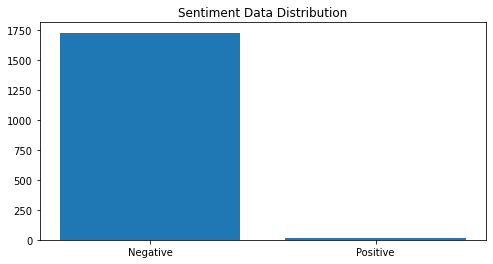

In [5]:
val_count = df.Sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [33]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [34]:
# 清洗 可做可不做
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
    return " ".join(tokens)

df['Lab Comments'] = df['Lab Comments'].apply(lambda x: preprocess(x))

In [6]:
df

,GlobalID,Notes,Sentiment
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},"One dead wasp seen in Blaine, and suspect flyi...",Positive
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},Hornet specimen sent to WSU,Positive
2,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},This was the colony that was found and destroy...,Positive
3,{1C6D0EAB-F68D-411D-974E-1233618854CC},Specimen collected by citizen scientist and re...,Positive
4,{7F3B6DB6-2ED4-4415-8DC2-3F03EC88F353},Insects observed late Sept or early Oct,Positive
...,...,...,...
1737,{73B68763-DB2F-4E33-A5DC-A4C73F54B143},as big as a spider and exceptionally large bod...,Negative
1738,{5E01D3A1-46B2-4124-A9BD-9BB9D9873757},Super fast and kept banging in my sliding door,Negative
1739,{04B3A8BE-2667-4A57-9E6A-D1C6D940F04E},I was walking on the selah cliffs trail and fo...,Negative
1740,{68887AEA-55BA-4FF8-BCD9-7D4082C065D0},Flew away towards the west,Negative


## Positive Words

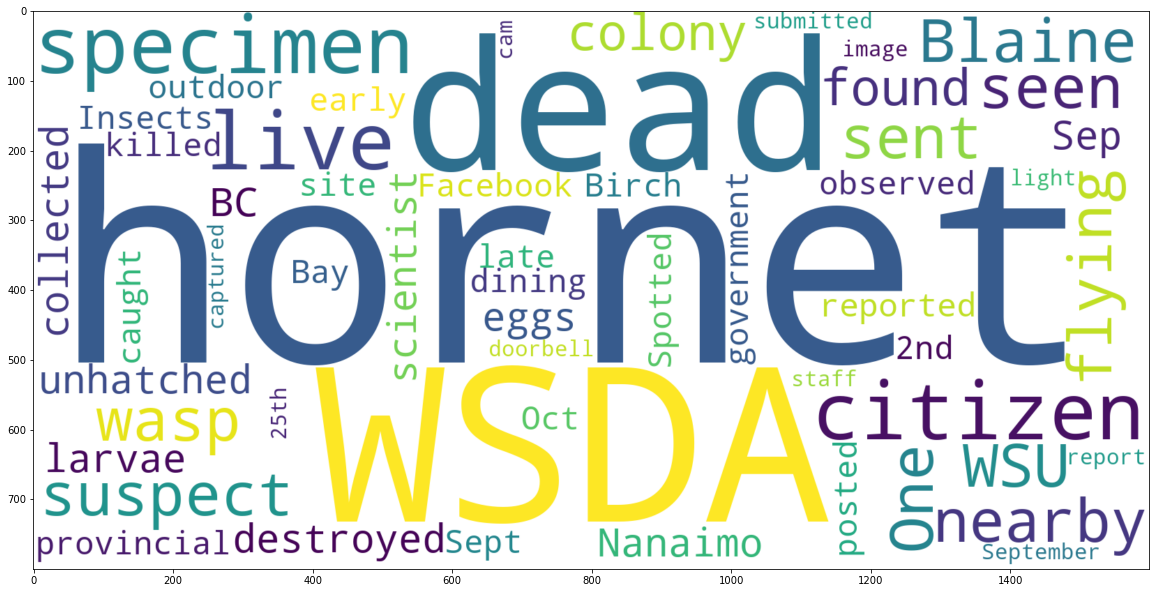

In [7]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color='White').generate(" ".join(df[df.Sentiment == 'Positive']['Notes']))
plt.imshow(wc , interpolation = 'bilinear')

## Negative Words

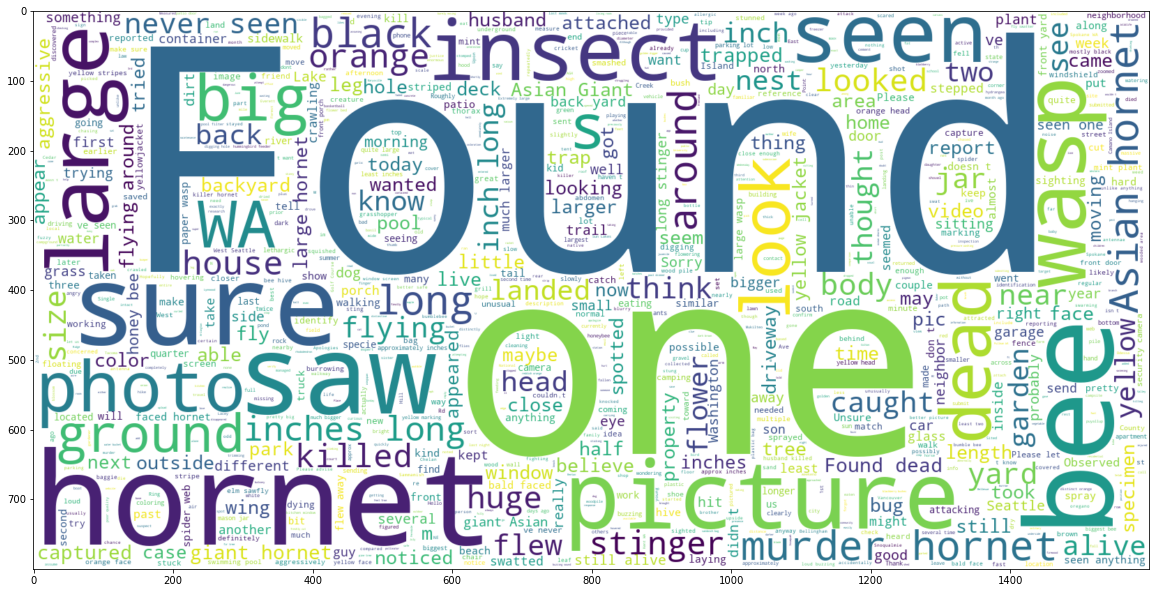

In [8]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color='White').generate(" ".join(df[df.Sentiment == 'Negative']['Notes']))
plt.imshow(wc , interpolation = 'bilinear')

In [52]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [53]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) 
# Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1620
Test Data size 406


In [54]:
train_data.head()

,Lab Comments,Sentiment
1707,Thanks for the submission. That is a wood wasp...,0.0
1405,Thanks for the submission. That is a horntail ...,0.0
167,That's a native elm sawfly! Notice his clubbed...,0.0
1795,Thanks for the submission. That is a wood wasp...,0.0
640,Golden digger wasp.,0.0


In [55]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Lab Comments'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 714


In [56]:
word_index

{'a': 1,
 'the': 2,
 'that': 3,
 'is': 4,
 'for': 5,
 'thanks': 6,
 'submission': 7,
 'wasp': 8,
 'sawfly': 9,
 'digger': 10,
 'golden': 11,
 'horntail': 12,
 'wood': 13,
 'great': 14,
 'hornet': 15,
 'to': 16,
 'cicada': 17,
 'like': 18,
 'killer': 19,
 "that's": 20,
 'looks': 21,
 'it': 22,
 'female': 23,
 'them': 24,
 'please': 25,
 'in': 26,
 'your': 27,
 'urocerus': 28,
 'beetle': 29,
 'as': 30,
 'this': 31,
 'kill': 32,
 'or': 33,
 'known': 34,
 'faced': 35,
 'bald': 36,
 'giant': 37,
 'asian': 38,
 'native': 39,
 "don't": 40,
 'not': 41,
 'are': 42,
 'was': 43,
 'bee': 44,
 'elm': 45,
 'bumble': 46,
 'june': 47,
 'bug': 48,
 'of': 49,
 'otherwise': 50,
 'but': 51,
 'genus': 52,
 'an': 53,
 'they': 54,
 'harmless': 55,
 'and': 56,
 'ten': 57,
 'lined': 58,
 'hard': 59,
 'you': 60,
 'siricid': 61,
 'county': 62,
 'negative': 63,
 'western': 64,
 'also': 65,
 'yellowjacket': 66,
 'her': 67,
 'fly': 68,
 'sp': 69,
 'from': 70,
 'yellow': 71,
 'be': 72,
 'jacket': 73,
 'no': 74,
 'co

In [58]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['Lab Comments']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['Lab Comments']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1620, 30)
Testing X Shape: (406, 30)


In [59]:
labels = train_data.Sentiment.unique().tolist()

In [65]:
encoder = LabelEncoder()
encoder.fit(train_data.Sentiment.to_list())

y_train = encoder.transform(train_data.Sentiment.to_list())
y_test = encoder.transform(test_data.Sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1620, 1)
y_test shape: (406, 1)


In [66]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [69]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [70]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [71]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [72]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [74]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [75]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [77]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [76]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [78]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
2/2 [==============================] - 7s 773ms/step - loss: 0.6532 - accuracy: 0.6750 - val_loss: 0.3883 - val_accuracy: 0.9951
Epoch 2/10
2/2 [==============================] - 1s 255ms/step - loss: 0.3447 - accuracy: 0.9966 - val_loss: 0.1060 - val_accuracy: 0.9951
Epoch 3/10
2/2 [==============================] - 1s 259ms/step - loss: 0.0907 - accuracy: 0.9970 - val_loss: 0.0304 - val_accuracy: 0.9951
Epoch 4/10
2/2 [==============================] - 1s 250ms/step - loss: 0.0257 - accuracy: 0.9963 - val_loss: 0.0365 - val_accuracy: 0.9951
Epoch 5/10
2/2 [==============================] - 1s 249ms/step - loss: 0.0290 - accuracy: 0.9966 - val_loss: 0.0518 - val_accuracy: 0.9951
Epoch 6/10
2/2 [==============================] - 1s 267ms/step - loss: 0.0324 - accuracy: 0.9973 - val_loss: 0.0640 - val_accuracy: 0.9951
Epoch 7/10
2/2 [==============================] - 1s 252ms/step - loss: 0.0490 - accuracy: 0.9966 - val_loss: 0.0691 - val_accuracy: 0.9951
Epoch 8/10
2/2 [====

## Model Evaluation

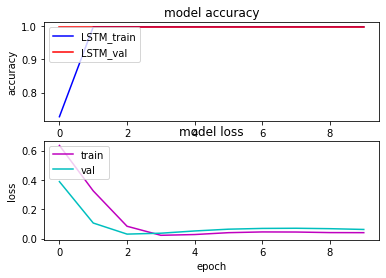

In [79]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [80]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 1s 713ms/step


In [ ]:
type(train_data.loc[0,'Lab Comment'])

In [81]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(test_data.Sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.Sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
import joblib
joblib.dump(history, 'history1_Lab.jlb')
joblib.dump(model, 'model1_Lab.jlb')